# LS 88 - Lab 4 - Reinhart and Rogoff

---

### Instructor Josh Quan & Eric Van Dusen

This notebook will explain how an excel file can be limited and hard to replicate by looking at a published research paper. The notebbook will explore the errors discovered from the paper through the analysis of means.

---
### Topics Covered
1. Exclusion of data affects results
2. Excel files can be limited and difficult to replicate


### Table of Contents

1. [Getting the Data](#data) <br>
2. [Context](#context) <br>
3. [Analyzing Means](#means) <br>
4. [Exploration](#explore) <br>
5. [Conclusions](#conclusions) <br>
6. [Bibliography](#bibliography) <br>



**Dependencies:**

Run the cell below and continue onwards!

In [26]:
from datascience import *
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')

---

## Background <a id='background'></a>
In this notebook, you will be working with data used in Carmen Reinhart and Kenneth Rogoff's 2010 study "Growth in a Time of Debt". The paper concluded an economic growth severely suffers when a country's public debt reaches 90% of GDP (Gross Domestic Product). They argue that the growth rate for these countries is -0.1. 
Reinhart and Rogoff's conclusions have been a subject of controversy due to methodological choices, and inability to reproduce findings.


---

## Context  <a id='context'></a>

While replicating the results, Herndon, Ash, and Pollin found issues with Reinhart's & Rogoff's analysis. One major error was a coding error that excluded 5 countries, as seen in the image below. R&R typed AVERAGE(L30:L44) instead of AVERAGE(L30:L49) in excel, which excluded Belgium from the analysis.


<img src="excelerror.png">

---

## The Data <a id='data'></a>
Reinhart and Rogoff's analysis is based on data from 44 countries spanning over 200 years. Economists Thomas Herndon, Michael Ash, and Robert Pollin of the University of Massachusetts were able to replicate the results only after obtaining Reinhart and Rogoff's data. Based on their own findings, they concluded "average real GDP growth rate for countries carrying a public debt to GDP ratio of over 90 percent is actually 2.2%, not -0.1% as published in R&R". We will base our own analysis after Herndon's, Ash's, and Pollin's investigation to learn where Reinhart and Rogoff went wrong. 


---

Let's begin by importing the data.

In [27]:
gdp = Table().read_table('image_data.csv')
gdp.show()

Country,Year,0-30%,30-60%,60-90%,Above 90%
US,1946-2009,nan,3.4,3.3,-2
UK,1946-2009,nan,2.4,2.5,2.4
Sweden,1946-2009,3.6,2.9,2.7,nan
Spain,1946-2009,1.5,3.4,4.2,nan
Portugal,1952-2009,4.8,2.5,0.3,nan
New Zealand,1948-2009,2.5,2.9,3.9,-7.9
Netherlands,1956-2009,4.1,2.7,1.1,nan
Norway,1947-2009,3.4,5.1,nan,nan
Japan,1946-2009,7,4,1,0.7
Italy,1951-2009,5.4,2.1,1.8,1


---

## Analyzing Means <a id='means'></a>

Let's start off by looking at the mean real GDP growth including all the countries for countries with above 90%. We filter the table first using `not np.isnan()` to remove null values in the column that we are interested in.

<!-- _A note on the code:_ Although you are used to using the `tbl.column()` method to access the columns of a table, we can also use **slicing** to select columns; the format for this is `tbl['col_name']`. Also, we can filter the rows of a table using this convention to bypass the `tbl.where()` method by putting an array of boolean values in the brackets, `tbl[bool_arr]`, and we can negate the array using the `~` operator (i.e. `~[True, False, True] = [False, True, False]`. -->

In [33]:
above90 = gdp.where('Above 90%', lambda x: not np.isnan(x)).column('Above 90%')
above90.mean()

0.26249999999999996

From the image of the excel spreadsheet, we can see that R&R excluded 5 countries from their calculations. Let's see how the means change when we exclude these 5 countries missing.

In [34]:
# remove Belgium because the other 4 countries are nan
removed = gdp.where('Country', are.not_equal_to('Belgium'))

removed_above90 = removed.where('Above 90%', lambda x: not np.isnan(x)).column('Above 90%')
removed_above90.mean()

-0.07142857142857142

Another issue was that R&R selectively choose their data. They chose to exclude New Zealand, which was an outlier because it was an examples of a high-debt and solid growth. Next, exclude New Zealand from the data and calculate the new column means.

In [35]:
# remove New Zealand from the table
not_newzealand = gdp.where('Country', are.not_equal_to('New Zealand'))

not_newzealand_above90 = not_newzealand.where('Above 90%', lambda x: not np.isnan(x)).column('Above 90%')
not_newzealand_above90.mean()

1.4285714285714286

**Question 1.** How does the mean change when certain countries are excluded? Explain how each scenario above affects the conclusions you are able to make about gdp growth for countries with a debt-to-gdp ratio above 90%. What lessons can we learn from this about handeling "outliers"?

**Replace this line with your response.** 

## Exploration <a id='explore'></a>

Let's further explore the relationship between debt-gdp ratio and economic growth. While looking at means is one way to analyze the data, there are several other methods of analysis. 

Create a bar chart to visualize real GDP growth for each country and debt-gdp category. 

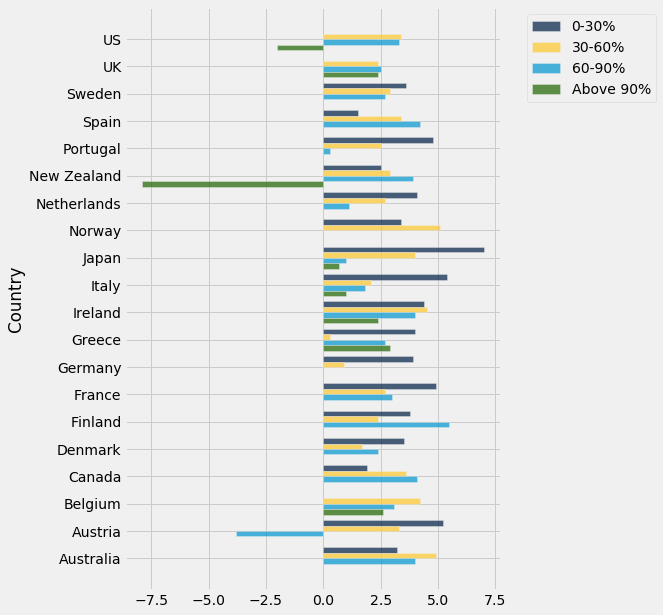

In [10]:
gdp.drop('Year').barh('Country')

**Question 2.** What can you infer from the visualization ?

**Replace this line with your response.**

Next, let's see if there is a significant difference between economic growth depending on a country's debt-to-gdp ratio. Compute the mean debt-to-gdp growth for countries with a debt-gdp ratio of 0-30%, 30-60%, and 60-90%. Compare each mean and comment and how the differences can be interpreted.

A way to read
- Columns: the point in which the public debt level reached X% percent of GDP
- Rows: Growth (in times of debt)

In [41]:
# 0-30% mean
below30 = gdp.where('0-30%', lambda x: not np.isnan(x)).column('0-30%')
print("0-30 : ",  below30.mean())

# 30-60% mean
middle30 = gdp.where('30-60%', lambda x: not np.isnan(x)).column('30-60%')
print("30-60 : ", middle30.mean())

# 60-90% mean
upper30 = gdp.where('60-90%', lambda x: not np.isnan(x)).column('60-90%')
print("60-90 : ", upper30.mean())

0-30 :  3.9470588235294115
30-60 :  2.995
60-90 :  2.5444444444444447


**Question 3.** Based on your analysis thus far, is there a relationship between being in debt and economic growth? If so, state the relationship and its implications. How does these values compare to the ones in the first portion of the notebook?

**Replace this line with your response.**

**Question 4.** Repeat the two calculations that you did before on the 0-30%,30-60%, 60-90% groups.  If you get stuck, refer back to the beginning of the notebook. 
* Exclude: Denmark, Canada, Belgium, Austria, and Australia 
* Remove: New Zealand 



**a)** Exclude: Denmark, Canada, Belgium, Austria, and Australia

In [39]:
# remove Belgium because the other 4 countries are nan
removed = gdp.where('Country', are.not_equal_to('Belgium'))

# 0-30% mean
removed_0_30 = ...
print("0-30 : ", removed_0_30.mean())


# 30-60% mean
removed_30_60 = ...
print("30-60 : ", removed_30_60.mean())


# 60-90% mean
removed_60_90 = ...
print("60-90 : ", removed_60_90.mean())


AttributeError: 'ellipsis' object has no attribute 'mean'

**b)** Remove: New Zealand

In [40]:
# remove New Zealand from the table
not_newzealand = gdp.where('Country', are.not_equal_to('New Zealand'))

# 0-30% mean
not_newzealand_0_30 = ...

# 30-60% mean
not_newzealand_30_60 = ...
print("30-60 : ", not_newzealand_30_60.mean())

# 60-90% mean
not_newzealand_60_90 = ...
print("60-90 : ", not_newzealand_60_90.mean())

AttributeError: 'ellipsis' object has no attribute 'mean'

## Conclusions <a id='conclusions'></a>

When Herndon, Ash, and Pollin replicated the analysis, there were several problems they found with Reinhart and Rogoff's paper. Some of these problems, we have touched on in our own analysis are coding errors and handling of outliers. As a result, we can see how their approach using excel files to carry out their analysis can be limited and hard for others to reproduce. This project highlights the importance of reproducibility and open source.

---

## Bibliography

- Data : https://gist.githubusercontent.com/vincentarelbundock/5409893/raw/a623f2f3bae027a0e51dd01ac5b70d44d909a7b9/RR-processed.csv
- Hadley Wickham : https://github.com/hadley/herndon-ash-pollin
- Vincent Arel-Bundock (BITSS) : https://github.com/BITSS/RT2_LOSANGELES_2018/blob/master/2b-dynamic-jupyter/notebooks/04_reinhart-rogoff.ipynb


---


**Additional Resources**:
- https://www.washingtonpost.com/news/wonk/wp/2013/04/16/is-the-best-evidence-for-austerity-based-on-an-excel-spreadsheet-error/?noredirect=on&utm_term=.06cb0844795f
- http://rooseveltinstitute.org/researchers-finally-replicated-reinhart-rogoff-and-there-are-serious-problems/

---
Notebook developed by: Lisa Zhou

Data Science Modules: http://data.berkeley.edu/education/modules
